## Overfitting - regularization
#### L2 and L1 regularization for linear estimators

In [1]:
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
print(boston.keys())
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)


In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
import numpy as np
import pandas as pd

bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Ex. 1 Split train-test dataset

In [5]:
tar = pd.DataFrame(boston.target)
tar.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bos, tar, test_size=0.2, random_state=42)

In [7]:
print(bos.shape[0])
print(float(X_train.shape[0]) / float(bos.shape[0]))
print(float(X_test.shape[0]) / float(bos.shape[0]))

506
0.7984189723320159
0.2015810276679842


Ex. 2 Linear regression

In [8]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [9]:
Y_pred = reg.predict(X_test)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

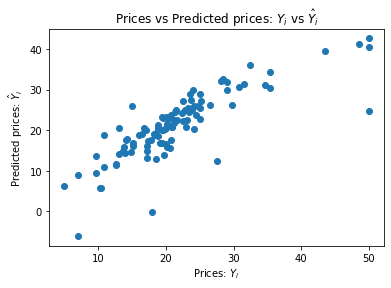

In [10]:
import matplotlib.pyplot as plt

plt.scatter(y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")


Ex. 3: To check the level of error of a model calculate the Mean Squared Error.

In [11]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, Y_pred)

24.29111947497343

Ex. 4: Calculate the model.score. Check what it is for linear problems.

In [12]:
reg.score(X_test, y_test, sample_weight=None)

0.6687594935356331

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(bos)
bos_norm = scaler.transform(bos)
bos_norm = pd.DataFrame(bos_norm)
bos_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [14]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=2)
bos_transform = polynomial_features.fit_transform(bos_norm)

X_train_transform, X_test_transform, y_train, y_test = train_test_split(bos_transform, tar, test_size=0.2, random_state=42)

In [15]:
reg_transform = LinearRegression().fit(X_train_transform, y_train)

Y_pred_transform = reg_transform.predict(X_test_transform)

In [16]:
mean_squared_error(y_test, Y_pred_transform)

14.229518807962831

In [17]:
reg_transform.score(X_test_transform, y_test, sample_weight=None)

0.8059622973922655

In [18]:
from sklearn.linear_model import Ridge, Lasso

Ex. 5: Lasso (L1)

In [19]:
clf = Lasso(alpha=1.0)
clf.fit(X_train_transform, y_train)
clf_pred = clf.predict(X_test_transform)
clf.score(X_test_transform, y_test)

0.735213747415629

In [20]:
mean_squared_error(y_test, clf_pred)

19.41777763085677

/home/wkula/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 980.3870060163626, tolerance: 3.509685514851485
  positive)
/home/wkula/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 755.1943886714357, tolerance: 3.509685514851485
  positive)
/home/wkula/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 266.95232816167254, tolerance: 3.509685514851485
  positive)
/home/wkula/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:53

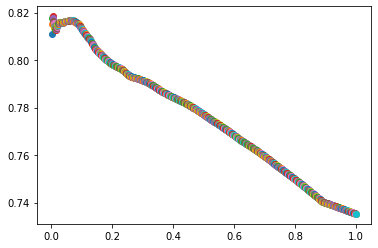

In [21]:
from numpy import linspace

for a in linspace(0.001, 1, num=1000):
    clf = Lasso(alpha=a)
    clf.fit(X_train_transform, y_train)
    plt.scatter(a, clf.score(X_test_transform, y_test))

Ex. 5: Ridge (L2)

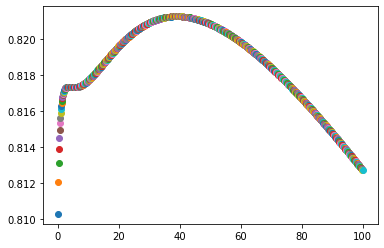

In [22]:
for a in linspace(0.1, 100, num=1000):
    clf = Ridge(alpha=a)
    clf.fit(X_train_transform, y_train)
    plt.scatter(a, clf.score(X_test_transform, y_test))

### Regularization for logistic regression

In [23]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

Ex. 1: Using function .isnull() check wether the database contains missing values.
Please fill the missing values with mean values for giving class.

In [24]:
y = pd.DataFrame(data.target)
X = pd.DataFrame(data.data, columns=data.feature_names)
X.isnull().all().all()

False

Ex. 2: Divide the dataset into training and testing. Remove the first column containing the ID of the examined person.

In [25]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Ex. 3: Using the available libraries in Python, create a logistic regression model with L1 regularization and C = 1 regularization parameter.

In [27]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(penalty='l1', C=1.0, random_state=0, solver='liblinear').fit(X_train, y_train)

/home/wkula/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/wkula/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [28]:
logistic.score(X_test, y_test)

0.956140350877193

Ex. 4: Draw a plot of the algorithm accuracy for the L2 regularization (10 values of the regularization parameter C in the following range [0.0001; 1])

/home/wkula/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/wkula/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/wkula/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/wkula/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when 

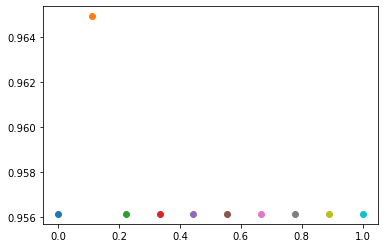

In [29]:
for c in linspace(0.0001, 1, num=10):
    log_l2 = LogisticRegression(penalty='l2', C=c, random_state=0, solver='liblinear').fit(X_train, y_train)
    plt.scatter(c,log_l2.score(X_test, y_test))

## Regularization for kNN method
Using the solution from previous lab, please draw a plot for the kNN algorithm's accuracy depending on the value of k. Please indicate the optimal value for k.

#### 2. kNN - Python (sklearn)

In [30]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [31]:
# 1. Podziel zbiór na uczący (70 %) i treningowy (30 %).
iris = datasets.load_iris()

features_train, features_test, labels_train, labels_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

In [32]:
k=3
# 2. Stworzenie klasyfikatora i jego wyuczenie.
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(features_train, labels_train)

# 3. Predykcja wartości.
predictions = neigh.predict(features_test)
# 4. Wyznaczenie miary skuteczności dla zbioru testowego (ang. accuracy).
output = accuracy_score(labels_test, predictions)
print(output)

1.0


Optimal k = 1 with acc = 100.0%


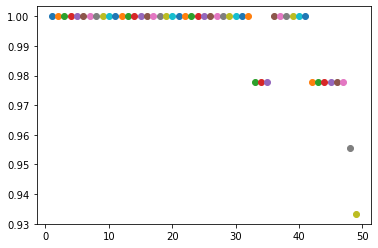

In [33]:
k_opt = 0
score_otp = 0
for k in range(1, 50, 1):
    neigh = KNeighborsClassifier(n_neighbors=k).fit(features_train, labels_train)
    sc = neigh.score(features_test, labels_test)
    plt.scatter(k, sc)
    if score_otp < sc:
        k_opt = k
        score_otp = sc

print(f'Optimal k = {k_opt} with acc = {score_otp*100}%')

## Decision trees optimization
Using the solution from previous lab, please draw a plot for the decision tree accuracy/score depending on the depth of the tree. Please indicate the optimal tree depth.

### 3. drzewa decyzyjne

In [34]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
DEPTH = 10
clf = tree.DecisionTreeClassifier(max_depth=DEPTH, random_state=0).fit(iris.data, iris.target)

Optimal depth = 3 with acc = 100.0%


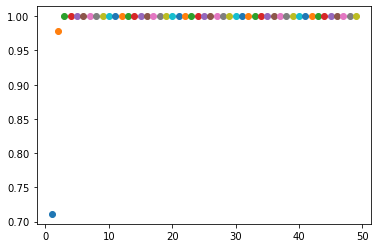

In [35]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

depth_opt = 0
score_otp = 0
for DEPTH in range(1, 50, 1):
    clf = tree.DecisionTreeClassifier(max_depth=DEPTH, random_state=0).fit(X_train, y_train)
    sc = clf.score(X_test, y_test)
    plt.scatter(DEPTH, sc)
    if score_otp < sc:
        depth_opt = DEPTH
        score_otp = sc

print(f'Optimal depth = {depth_opt} with acc = {score_otp*100}%')